# Graphs representing blacklisting across networks with variable lies

This notebook allows us to create graphs showing how many liars are blacklisted, depending on the type of lies told.

The data for these graphs can be collected using the go test **TestVarLiesGraphCreation** and setting the config **linear** to **true**.

 The generated graphs can be found under python_graphs/var_lies/graphs/linear.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#configs - these must match the configs in the graph_var_lies_test.go file to correctly retrieve the data
linear = True        #collect data as sum or as percentage
withSuspects = True  #use enhanced blacklisting algorithm
singleVictim = True #liars target single victim
coordinated = True  #liars coordinate (their lies do not contradict each other)
nbNodes = 100
nbLiars = 33
maxLatency = 7000    #the maximum amount by which a lie deviates from the corresponding latency's true value

nbVictims = "all"
if singleVictim:
    nbVictims = "one"
    
coord = "coordinated"
if coordinated == False:
    coord = "uncoordinated"

filename = "test_" + str(nbNodes) + "_nodes_" + str(nbLiars) + "_liars"+"_attack_" + nbVictims + \
"_distance_" + str(maxLatency)+"_" + coord

if withSuspects:
    filename += "_with_suspects"

In [3]:
statuses = {0: "no endpoint blacklisted", 1: "one endpoint blacklisted", 2: "both endpoints blacklisted"}
colors = {"no endpoint blacklisted": "green", 
          "one endpoint blacklisted": "blue", 
          "both endpoints blacklisted": "red"}

In [4]:
data= pd.read_csv("data/linear/"+filename +".csv")[["true_latency", "recorded_latency", "blacklist_status"]]

In [5]:
data["status"] = data["blacklist_status"][data["blacklist_status"] > -1 ].map(statuses)

In [6]:
data

,true_latency,recorded_latency,blacklist_status,status
0,581,581,0,no endpoint blacklisted
1,887,887,0,no endpoint blacklisted
2,847,847,0,no endpoint blacklisted
3,559,559,0,no endpoint blacklisted
4,581,581,0,no endpoint blacklisted
5,818,818,0,no endpoint blacklisted
6,925,925,0,no endpoint blacklisted
7,540,540,0,no endpoint blacklisted
8,956,956,0,no endpoint blacklisted
9,800,800,0,no endpoint blacklisted


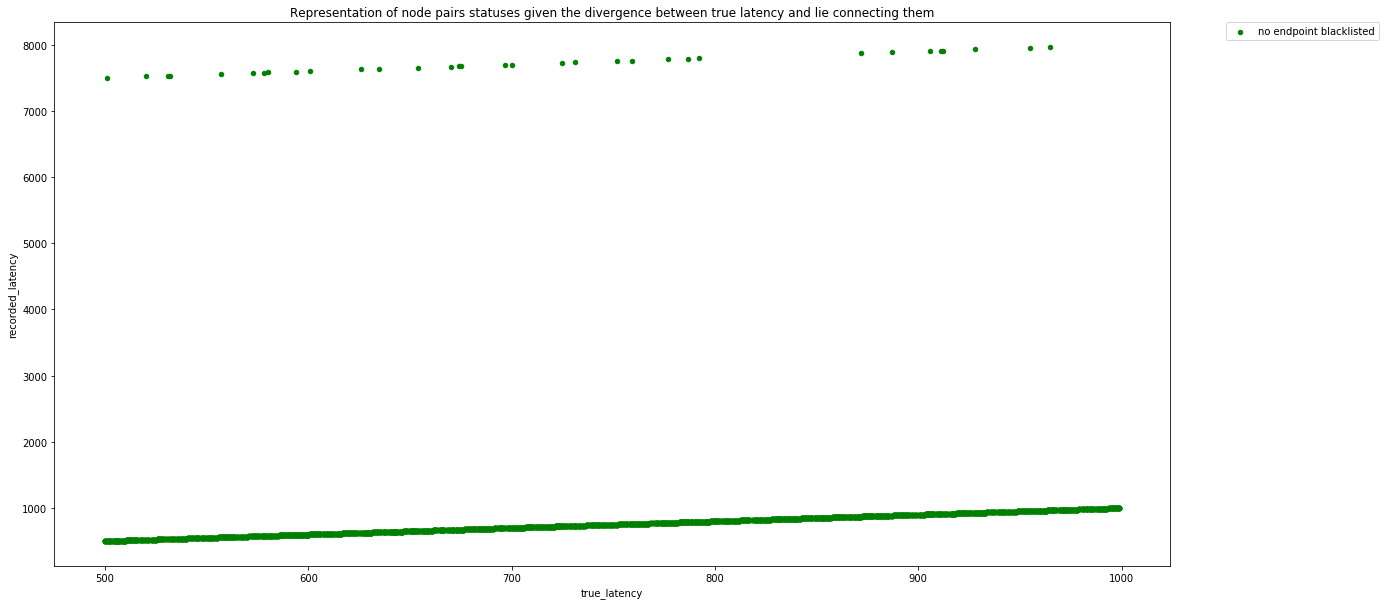

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
grouped = data.groupby('status')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='true_latency', y='recorded_latency', label=key, color=colors[key])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Representation of node pairs statuses given the divergence between true latency and lie connecting them")

plt.show()

In [8]:
fig.savefig("graphs/linear/"+filename +".png")

No handles with labels found to put in legend.


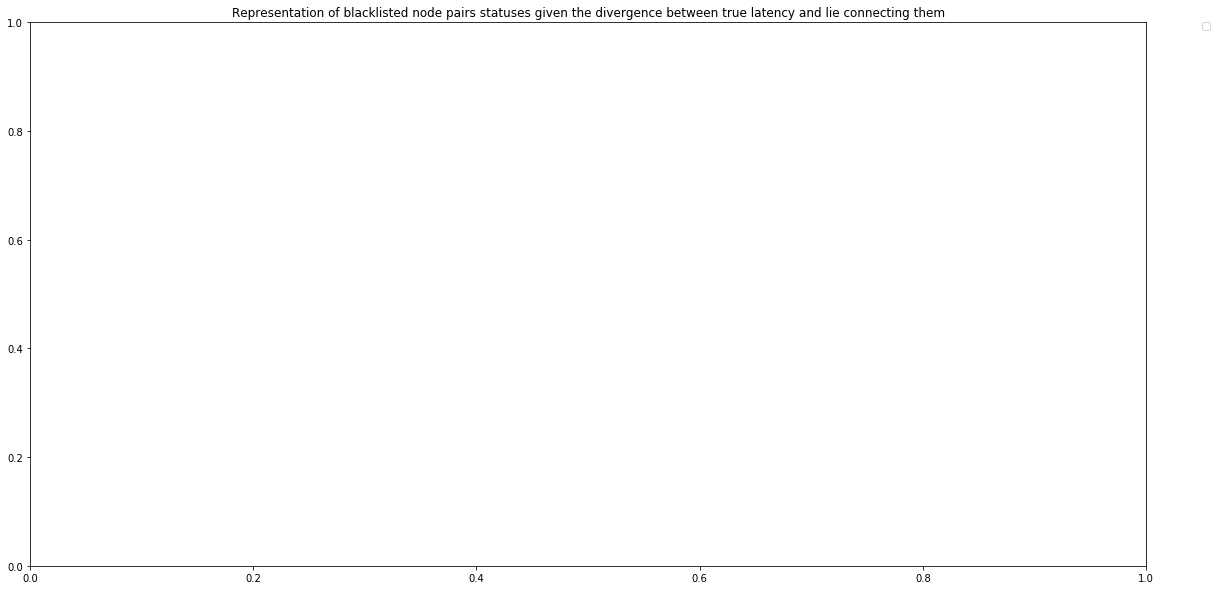

In [9]:
fig1, ax1 = plt.subplots(figsize=(20, 10))
grouped = data[data["blacklist_status"] > 0].groupby('status')
for key, group in grouped:
    group.plot(ax=ax1, kind='scatter', x='true_latency', y='recorded_latency', label=key, color=colors[key])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(
    "Representation of blacklisted node pairs statuses given"+ \
    " the divergence between true latency and lie connecting them")


plt.show()

In [10]:
fig1.savefig("graphs/linear/"+filename +"_without_unblacklisted.png")